In [90]:
import numpy as np
import pandas as pd
#read in data
geneData=pd.read_csv('PythonGeneData/GeneD.csv')

In [91]:
type(geneData)

pandas.core.frame.DataFrame

In [92]:
geneData.head()

,Item Name,Gene,Voxel Count,Mean of Background,Sum of Signal,Signal
0,C1,C,1233,12.76,70055,54321.92
1,C2,C,1570,14.49,88238,65488.70
2,C3,C,807,9.46,48240,40605.78
3,C4,C,696,11.68,40942,32812.72
4,C5,C,570,12.55,32539,25385.50


In [93]:
geneData.columns

Index(['Item Name', 'Gene', 'Voxel Count', 'Mean of Background ',
       'Sum of Signal ', 'Signal'],
      dtype='object')

In [94]:
#descriptive stats
geneData.describe()

,Voxel Count,Mean of Background,Sum of Signal,Signal
count,119.000000,119.000000,1.190000e+02,1.190000e+02
mean,10414.588235,12.992269,6.874124e+05,5.018333e+05
std,16272.906368,4.049264,1.045026e+06,7.058210e+05
min,15.000000,5.700000,8.530000e+02,7.274500e+02
25%,723.500000,10.345000,4.297150e+04,3.459487e+04
50%,3018.000000,12.380000,1.901770e+05,1.471705e+05
75%,13145.500000,14.810000,9.607865e+05,7.308148e+05
max,94704.000000,28.150000,5.616275e+06,3.591503e+06


In [95]:
#select gene and signal 
geneData[['Gene','Signal']].head()

,Gene,Signal
0,C,54321.92
1,C,65488.70
2,C,40605.78
3,C,32812.72
4,C,25385.50


In [96]:
#group by gene and signal, aggregate size, mean, standard dev
geneData.groupby('Gene').agg({'Signal':[np.size, np.mean, np.std]})

Signal                            
         size          mean           std
Gene                                     
C        12.0  5.513944e+04  3.636462e+04
G         6.0  6.152128e+04  3.242734e+04
G INJ     5.0  1.085847e+06  8.794870e+05
GS        7.0  1.450321e+06  1.174634e+06
GS INJ    8.0  1.782489e+06  7.492405e+05
INJ      14.0  1.067277e+06  5.211588e+05
IR       18.0  4.362124e+04  5.048710e+04
IR INJ   18.0  5.572993e+05  2.738442e+05
WT       15.0  3.209895e+04  2.781652e+04
WT INJ   16.0  1.628770e+05  1.758718e+05

In [97]:
graphData=geneData.groupby('Gene').agg({'Signal':[np.size, np.mean, np.std]})

In [98]:
#plot time
%matplotlib inline
import matplotlib.pylab as plt

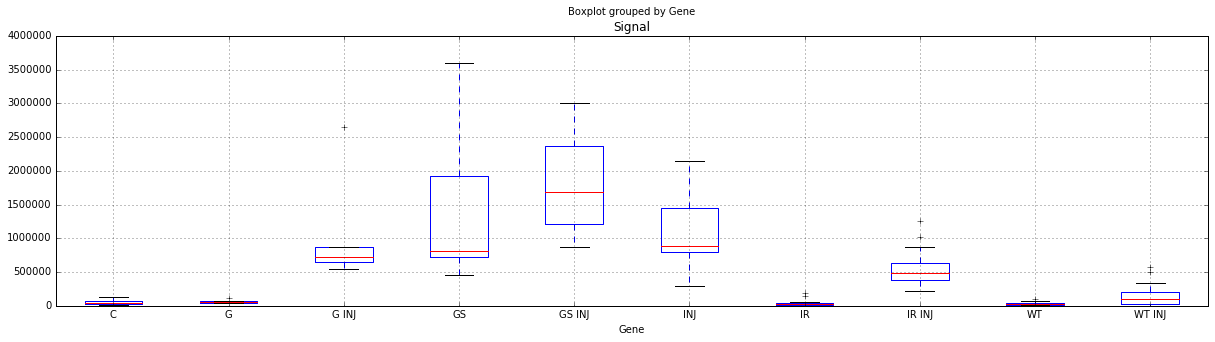

In [99]:
#boxplot
geneData.boxplot(column='Signal', by='Gene', figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f6bc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b4e320>]], dtype=object)

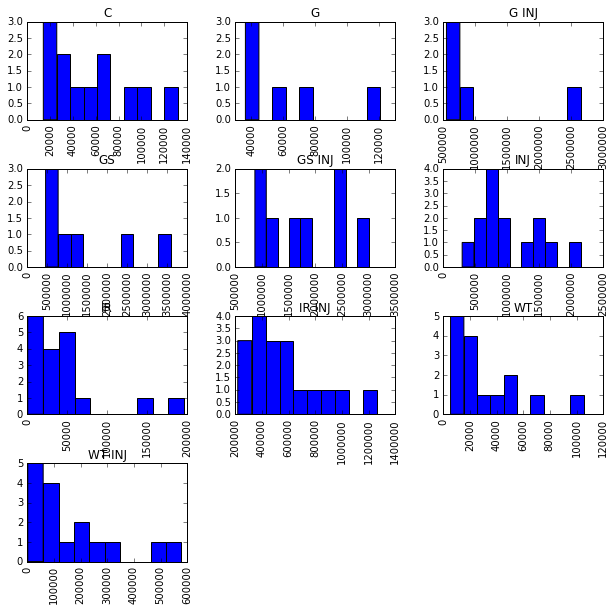

In [100]:
#looks ok, let's look at a histogram for each gene
#plot histogram
geneData.hist(column='Signal', by='Gene', bins=10, figsize=(10,10))

In [101]:
graphData.head()

Signal                            
         size          mean           std
Gene                                     
C        12.0  5.513944e+04  3.636462e+04
G         6.0  6.152128e+04  3.242734e+04
G INJ     5.0  1.085847e+06  8.794870e+05
GS        7.0  1.450321e+06  1.174634e+06
GS INJ    8.0  1.782489e+06  7.492405e+05

In [102]:
# how about a bar graph now to compare means before and after injury
n_groups=5
means_uninj=(5.51, 6.15, 1.45, 4.36, 3.21)
std_uninj=(3.64, 3.24, 1.17, 5.05, 2.78)
means_inj=(1.07, 1.09, 1.78, 5.57, 1.63)
std_inj=(5.21, 8.79, 7.49, 2.74, 1.76)

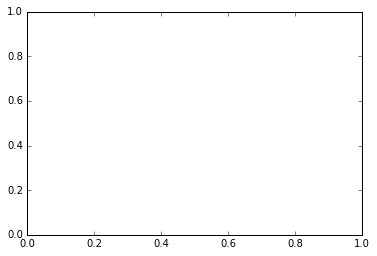

In [103]:
#set up first steps
fig, ax = plt.subplots()
index=np.arange(n_groups)
bar_width=.3
opacity=.4
error_config={'ecolor': '0.3'}

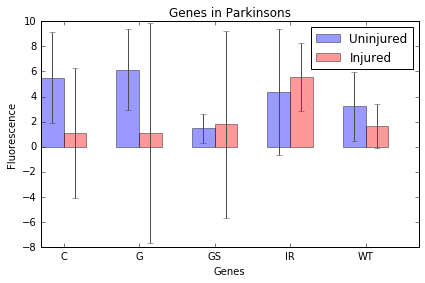

In [104]:
#fill in the graph
rects1 = plt.bar(index, means_uninj, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_uninj,
                 error_kw=error_config,
                 label='Uninjured')
rects2 = plt.bar(index + bar_width, means_inj, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_inj,
                 error_kw=error_config,
                 label='Injured')
plt.xlabel('Genes')
plt.ylabel('Fluorescence')
plt.title('Genes in Parkinsons')
plt.xticks(index + bar_width, ('C','G','GS','IR','WT'))
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
#std error bars are HUGE for genes G and GS for injured conditions